In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [3]:
from numpy import sin, cos, pi
import matplotlib.animation as animation

粒界ごとに変えなければいけない変数
dirname => pickle file
timestep => global variables
ていうかpickleを使えばdatasetの関数はいらない

tot_timestepはdatasetを読み込んだときにlen()で取得できる


timestepとdatasetに共通のものを使う以上、classを定義したほうが見通し良い

In [4]:
import pickle
def read_hc_pickle(filename):
    with open(filename,"rb") as f:
        x = pickle.load(f)
    return x

In [5]:
# 2
def args_generator_ax1(count,points1):
    counter, y1 = points1
    y_red = y1[count]
    points2 = (count,y_red) # count -> count-1
    title = f"timestep = {count}"
    return points1, points2, title

In [6]:
# 2
def args_generator_ax2(count,points1):
    title = f"timestep = {count}"
    return points1, title

In [7]:
# 2
def args_generator_ax3(count,points1):
    title = f"timestep = {count}"
    return points1, title

In [8]:
def make_ax1(ax, count,dataset):
    # あえてなかで呼び出すことで関数の引数をいじらなくていいようにできる
    points1, points2, title = args_generator_ax1(count,dataset)
    x_scatter = ax.scatter(*points1, c="blue")
    x_scatter_red = ax.scatter(*points2, 
                                 c="red",
                                 s=200)
    timestep, energy = points1
    # タイトルテキスト
    title = ax.text(timestep.max()/2, energy.max()+1, 
                     title,
                     ha='center', va='bottom',fontsize='small')
    return [x_scatter, x_scatter_red, title]

In [9]:
# for homcloud
def make_ax2(ax, count,dataset):
    # あえてなかで呼び出すことで関数の引数をいじらなくていいようにできる
    points1, title = args_generator_ax2(count,dataset)
    x_scatter = ax.scatter(*points1, alpha= 0.25, c= "gray",s = 5)
    plot_range = [0,5]
    auxiliary_line = ax.plot(plot_range, plot_range,ls="--")[0]
    
    
    title = ax.text(2.5, 5,
                   title,
                   ha='center', va='bottom',fontsize='small')
    x, y = points1
    x_y = np.vstack((x,y)).T
    num_of_points = len(x_y[np.all(x_y < 7, axis=1), :])
    N_points = ax.text(2.5,6,f"num of points = {num_of_points}",ha='center', va='bottom',fontsize='small')
#     title = ax.text(title, loc='center')
    return [x_scatter, auxiliary_line, title, N_points]

In [10]:
def make_ax3(ax,count,dataset):
    points1, title= args_generator_ax3(count,dataset)
    birth_times, death_times = points1
    histogram = ax.hist(death_times - birth_times, bins=100, range=(0,1.5))
    histogram = list(histogram)[2]
    histogram = histogram.patches
    title = ax.text(0.75, -1,
                   title,
                   ha='center', va='bottom',fontsize='small')
    histogram.append(title)
    return histogram

In [127]:
dataset = read_hc_pickle("410_norelaxation_wrapped.pkl")

In [130]:
time = 22
fig_scatter, axes = plt.subplots(2,2, tight_layout = True)
axes[0][1].set_xlim([0,5])
axes[0][1].set_ylim([0,5])
axes[0][1].set_aspect("equal")
axes[0][1].set_xlabel("births")
axes[0][1].set_ylabel("deaths")
axes[1][1].set_xlim([0,5])
axes[1][1].set_ylim([0,5])
axes[1][1].set_aspect("equal")
axes[1][1].set_xlabel("births")
axes[1][1].set_ylabel("deaths")
snapshot = make_snapshot([make_ax1(axes[0][0], time, dataset[time][0]), make_ax2(axes[1][1], time, dataset[time][2]), make_ax3(axes[2][0], time, dataset[time][2])])

<IPython.core.display.Javascript object>

IndexError: index 2 is out of bounds for axis 0 with size 2

合成関数や合成変数を渡すためだけの関数を使う\
つまり、作った関数に"合った"引数を用意するため"だけ"の関数

関数の名前や、引数の形を可変長引数でもいいから"統一"しておけば\
外側の関数を変更するだけでロバストなプログラムを作る事ができる\
\
つまり、オペレーションを関数の形にしたり、データの用意などを関数の形にしておけば\
アウトプットの形だけ固定すればロバストになる

できるだけ"変えたくないのなら"、"変えなくていい"形で\
定義すればいい!\
たとえば、引数を取らない関数を使う、引数として絶対に変わらないところを引数にするなど

プログラムに対する摂動の影響を、書き換える部分をできるだけ小さくするために\
なおかつ、しっかりと影響を連動させるために関数を挟む

In [ ]:
, make_ax2(axes[1][1], time, dataset[time][2]), make_ax3(axes[2][0], time, dataset[time][2])

In [135]:
# 具体例を関数に作り変えた例
# 変えるのはforループになりそうなところ,つまり添字かついている部分を変数として扱う
def set_snapshots_for_anime(shape,**kwargs):
    fig_scatter, axes = plt.subplots(*shape,**kwargs)
    axes[0][1].set_xlim([0,5])
    axes[0][1].set_ylim([0,5])
    axes[0][1].set_aspect("equal")
    axes[0][1].set_xlabel("births")
    axes[0][1].set_ylabel("deaths") 
    axes[1][1].set_xlim([0,5])
    axes[1][1].set_ylim([0,5])
    axes[1][1].set_aspect("equal")
    axes[1][1].set_xlabel("births")
    axes[1][1].set_ylabel("deaths")

    plt_scatter = []
    dataset = read_hc_pickle("410_norelaxation_2.pkl")

#     for time in range(len(dataset)):
    for time in range(len(dataset)):
        snapshot = make_snapshot([make_ax1(axes[0][0], time, dataset[time][0]),make_ax2(axes[0][1], time, dataset[time][1]),make_ax3(axes[1][0], time, dataset[time][1]), make_ax2(axes[1][1], time, dataset[time][2]), make_ax3(axes[2][0], time, dataset[time][2])])
        plt_scatter.append(snapshot)
    return fig_scatter, plt_scatter

In [12]:
def make_snapshot(ax_list):
    return list(itertools.chain.from_iterable(ax_list))

<IPython.core.display.Javascript object>


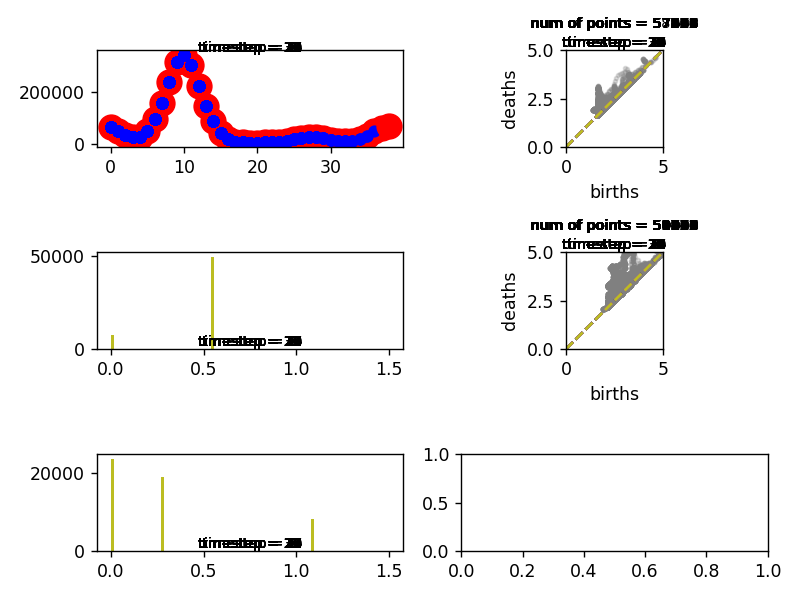

In [136]:
fig_scatter, plt_scatter = set_snapshots_for_anime((3,2), tight_layout = True)

In [116]:
# y = energy, としてもう一つはPD of each timestep, なのでPDをtimestep orderで並べたもの
def save_animation(fig, plt_array, interval = 500, filename = "sample.gif", writer = "imagemagick", **kwargs):
    # アニメーション作成
    ani = animation.ArtistAnimation(fig, plt_array, interval)

    # 保存
    ani.save(filename, writer = writer, **kwargs)

In [137]:
save_animation(fig_scatter, plt_scatter, interval = 500, filename = "410_norelaxation_2.mp4", writer = "ffmpeg", dpi = 300)

In [15]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


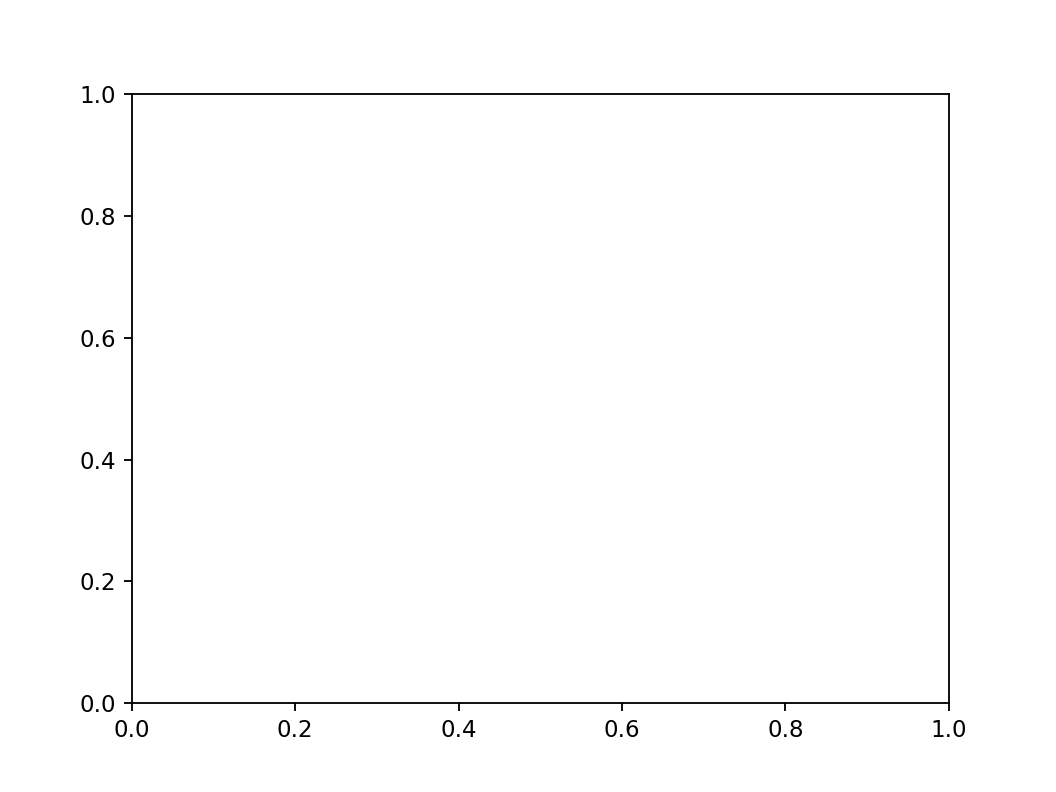

In [346]:
fig, ax = plt.subplots()

In [347]:
plt_scatter = []
for time, data in enumerate(dataset_2,1):
    title = f"timestep = {time}"
    birth_times, death_times = data
    histgram = ax.hist(death_times - birth_times, bins=100, range=(0,1.5))
    histgram = list(histgram)[2]
    histgram = histgram.patches
    title = ax.text(0.75, -1,
                   title,
                   ha='center', va='bottom',fontsize='large')
    histgram.append(title)
    plt_scatter.append(histgram) 

In [348]:
plt_scatter

[[<matplotlib.patches.Rectangle at 0x163631ee2c8>,
  Text(0.75, -1, 'timestep = 1')],
  Text(0.75, -1, 'timestep = 2')],
  Text(0.75, -1, 'timestep = 3')],
  Text(0.75, -1, 'timestep = 4')],
  Text(0.75, -1, 'timestep = 5')],
  Text(0.75, -1, 'timestep = 6')],
  Text(0.75, -1, 'timestep = 7')],
  Text(0.75, -1, 'timestep = 8')],
  Text(0.75, -1, 'timestep = 9')],
  Text(0.75, -1, 'timestep = 10')],
  Text(0.75, -1, 'timestep = 11')],
  Text(0.75, -1, 'timestep = 12')],
  Text(0.75, -1, 'timestep = 13')],
  Text(0.75, -1, 'timestep = 14')],
  Text(0.75, -1, 'timestep = 15')],
  Text(0.75, -1, 'timestep = 16')],
  Text(0.75, -1, 'timestep = 17')],
  Text(0.75, -1, 'timestep = 18')],
  Text(0.75, -1, 'timestep = 19')],
  Text(0.75, -1, 'timestep = 20')],
  Text(0.75, -1, 'timestep = 21')],
  Text(0.75, -1, 'timestep = 22')],
  Text(0.75, -1, 'timestep = 23')],
  Text(0.75, -1, 'timestep = 24')],
  Text(0.75, -1, 'timestep = 25')],
  Text(0.75, -1, 'timestep = 26')],
  Text(0.75, -1, 'time

In [320]:
plt_scatter[0].patches